In [1]:
import pandas as pd

In [2]:
df = pd.read_html("scores_project1.xml")[0]

In [3]:
df

,0,1,2,3
0,1,Gitwrecked,0.773651857613,0.740200205308
1,2,Buddhism,0.766709805503,0.736706839014
2,3,Amles,0.777533057147,0.735522492724
3,4,Xyw,0.764229152254,0.733463980274
4,5,Themusketeers,0.773582181137,0.732792633974
...,...,...,...,...
174,175,Xyz,no result,no result
175,176,Antti,no result,no result
176,177,Soontodropout,no result,no result
177,178,Deepdivers,no result,no result


In [4]:
df = df.rename(columns={0:'private_rank', 1:'name', 2:'public', 3:'private'})

In [5]:
df

,private_rank,name,public,private
0,1,Gitwrecked,0.773651857613,0.740200205308
1,2,Buddhism,0.766709805503,0.736706839014
2,3,Amles,0.777533057147,0.735522492724
3,4,Xyw,0.764229152254,0.733463980274
4,5,Themusketeers,0.773582181137,0.732792633974
...,...,...,...,...
174,175,Xyz,no result,no result
175,176,Antti,no result,no result
176,177,Soontodropout,no result,no result
177,178,Deepdivers,no result,no result


In [6]:
import seaborn as sns
import numpy as np
from scipy import stats


%matplotlib inline


In [7]:
df = df.drop(df[df.public == 'no result'].index)
df

,private_rank,name,public,private
0,1,Gitwrecked,0.773651857613,0.740200205308
1,2,Buddhism,0.766709805503,0.736706839014
2,3,Amles,0.777533057147,0.735522492724
3,4,Xyw,0.764229152254,0.733463980274
4,5,Themusketeers,0.773582181137,0.732792633974
...,...,...,...,...
169,170,Fjg,0.533881577204,0.482027864089
170,171,Qwertzuiop,0.522227486986,0.451606986303
171,172,Pocho,-0.00535191876933,-0.000494057567652
172,173,sample,-0.00337561152889,-0.00337561152889


/home/chrome/.miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Public leaderboard score density')

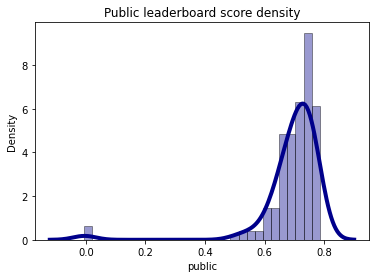

In [8]:
sns.distplot(df['public'], hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title('Public leaderboard score density')

/home/chrome/.miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Private leaderboard score density')

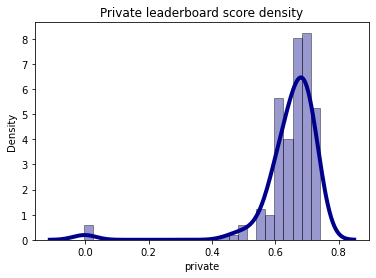

In [9]:
sns.distplot(df['private'], hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title('Private leaderboard score density')

In [10]:
df.describe()

,private_rank
count,174.000000
mean,87.500000
std,50.373604
min,1.000000
25%,44.250000
50%,87.500000
75%,130.750000
max,174.000000


In [11]:
df['public'] = df['public'].apply(lambda x: float(x))
df['private'] = df['private'].apply(lambda x: float(x))
type(df['public'][0])

numpy.float64

/home/chrome/.miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of team score changes from Pub. to Priv.')

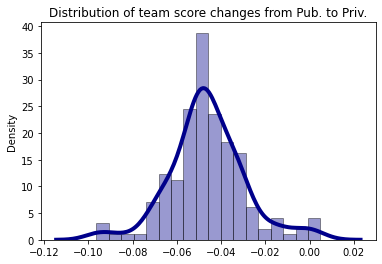

In [12]:
score_shifts = df['private'] - df['public']
df['score_shift'] = score_shifts

sns.distplot(score_shifts, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title('Distribution of team score changes from Pub. to Priv.')

In [13]:
score_shifts.describe()

count    174.000000
mean      -0.046330
std        0.016959
min       -0.096477
25%       -0.053807
50%       -0.047610
75%       -0.037257
max        0.004858
dtype: float64

In [14]:
print( 'Biggest fall: ' + 
      str( df['name'][list(score_shifts).index(min(list(score_shifts)))]) +
      ' shifted ' + str(min(score_shifts)))

print( 'Biggest gain: ' + 
    str( df['name'][list(score_shifts).index(max(list(score_shifts)))]) +
      ' shifted ' + str(max(score_shifts)))

Biggest fall: Yolo shifted -0.09647664408399992
Biggest gain: Pocho shifted 0.004857861201678


In [15]:
private_rank = df['private_rank']


temp = df['public'].argsort()


public_rank = np.array([len(df['public']) - a for a in list(temp)])

df['public_rank'] = public_rank

rank_change = (public_rank - private_rank)
df['rank_change'] = rank_change

rank_change.describe()

count    174.00000
mean       0.00000
std       17.34552
min      -67.00000
25%       -7.00000
50%        0.00000
75%        8.00000
max       55.00000
Name: private_rank, dtype: float64

/home/chrome/.miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ranking of team score changes from Pub. to Priv.')

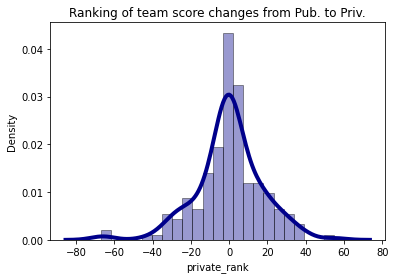

In [16]:
sns.distplot(rank_change, hist=True, kde=True, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title('Ranking of team score changes from Pub. to Priv.')

In [17]:
print( 'Biggest fall: ' + 
      str( df['name'][list(rank_change).index(min(list(rank_change)))]) +
      ' shifted ' + str(min(rank_change)))

print( 'Biggest gain: ' + 
    str( df['name'][list(rank_change).index(max(list(rank_change)))]) +
      ' shifted ' + str(max(rank_change)))

Biggest fall: Bobross shifted -67
Biggest gain: Deepseg shifted 55


In [18]:
# Hypothesis: Higher ranked teams dropped more on average in the scores?

df['private_rank'].corr(score_shifts)

0.004918285211347086

In [19]:
type(score_shifts)

pandas.core.series.Series

In [20]:
# Do higher ranked teams score changes vary less
# My god, even worse

df['private_rank'].corr(pd.Series([np.absolute(a) for a in score_shifts]))

0.0006425447719066857

In [22]:
team_stats = df.set_index('name')

In [24]:
team_stats.loc['Amles']

private_rank    3.000000
public          0.777533
private         0.735522
score_shift    -0.042011
public_rank     2.000000
rank_change    -1.000000
Name: Amles, dtype: float64

In [25]:
team_stats.loc['Whatever']

private_rank    32.000000
public           0.784421
private          0.708278
score_shift     -0.076143
public_rank     21.000000
rank_change    -11.000000
Name: Whatever, dtype: float64